# Importations

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [45]:
data = pd.read_parquet('data.parquet',engine='pyarrow')
print(data.shape)
print(data["where"])

(30342694, 7)
0              Razorfen Kraul
4                Winterspring
5                 Zangarmarsh
6           Shadowmoon Valley
8           Shadowmoon Valley
                  ...        
36513642            Orgrimmar
36513643        Warsong Gulch
36513644         Winterspring
36513645     Thousand Needles
36513646     Blackrock Depths
Name: where, Length: 30342694, dtype: category
Categories (173, object): ['Razorfen Kraul', 'Durotar', 'The Barrens', 'Silverpine Forest', ..., 'The Forbidding Sea', '15641', '61477', '1007城']


In [46]:
data.sort_values(by="race")
uniquePlayerData=data.drop_duplicates(subset="player_id")
print(uniquePlayerData.shape)

(20652, 7)


,player_id,guild,level,race,class,where,datetime
0,46340,53.0,26,Orc,Hunter,Razorfen Kraul,2007-06-12 03:17:48
4,45159,104.0,57,Orc,Warlock,Winterspring,2007-06-12 03:17:53
5,714,53.0,63,Orc,Rogue,Zangarmarsh,2007-06-12 03:17:53
6,1564,205.0,70,Orc,Warrior,Shadowmoon Valley,2007-06-12 03:18:03
8,43,5.0,70,Orc,Warrior,Shadowmoon Valley,2007-06-12 03:18:03


[5332 4937 3757 3735 2889    1    1    0    0    0]


c:\Users\cheni\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\cheni\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26063 (\N{CJK UNIFIED IDEOGRAPH-65CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\cheni\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22934 (\N{CJK UNIFIED IDEOGRAPH-5996}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


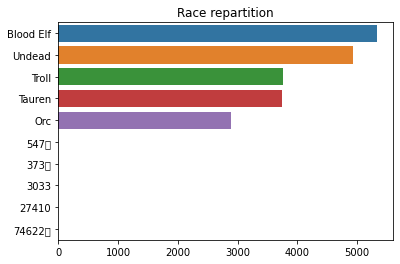

In [52]:
print(uniquePlayerData["race"].value_counts().values)
sns.barplot(uniquePlayerData,y=uniquePlayerData["race"].value_counts().index,x=uniquePlayerData["race"].value_counts().values,order = uniquePlayerData["race"].value_counts().index)
plt.title("Race repartition")
plt.show()

[3115 2960 2682 2370 2261 2023 1907 1430 1269  634    1    0    0]


c:\Users\cheni\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20234 (\N{CJK UNIFIED IDEOGRAPH-4F0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


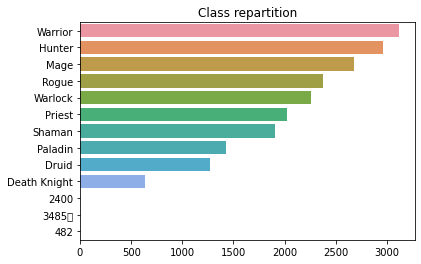

In [53]:
print(uniquePlayerData["class"].value_counts().values)
sns.barplot(uniquePlayerData,y=uniquePlayerData["class"].value_counts().index,x=uniquePlayerData["class"].value_counts().values,order = uniquePlayerData["class"].value_counts().index)
plt.title("Class repartition")
plt.show()

What do we learn by watching the class repartition? First, the most popular class is Warrior, which was predictable as it is the most basic class choice. It is most likely going to be the same on the Alliance side. Then, the least popular class is the Death Knight, which was also predictable, for two reasons: this is the latest class, added in the latest expansion (Wrath of the Lich King), and to create a Death Knight, the player has to have a character level 55 or above, which requires some playtime on another character. <br />

Now, let us take a look at some more technical results. The top 5 classes are damage dealer classes (known as DPS, for Damage Per Second), as player are more likely to play a damage dealing character instead of a tank or a healer. Even though Warrior have the Protection specialization (Tank) all the others (3 per classes, then 14 specializations) are DPS. This also explains why Priest (2 Healing specializations, 1 DPS) and Paladin (1 Healing specialization, 1 Tanking and 1 DPS) are a bit left behind. <br/>

One last question remains: why are Druid so rarely used? The answer lies in the class/race combination. Indeed, to create a Horde Druid in the game (in Wrath of the Lich King, there are new combinations available in the current version), you have to play a Tauren (and a Night Elf if you are playing for the Alliance). This restriction, coupled with the fact that the specializations are Healer/Tank/DPS, limits the number of players willing to play a Druid. 